# <center>IGR204 Data Visualization</center>

## Data Cleaning

In [35]:
# Imports:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import json
from math import pi
 

# Définition de paramètres 
pd.options.display.max_columns = 200
pd.options.display.max_rows = 500
sns.set()

In [3]:
data = pd.read_csv('data/SpeedDating.csv', encoding = 'latin-1', engine='python', sep=',')

In [4]:
data_women = data[data['gender'] == 0].copy()
data_men = data[data['gender'] == 1].copy()

In [5]:
print(data.shape)
print(data_women.shape)
print(data_men.shape)

(8378, 195)
(4184, 195)
(4194, 195)


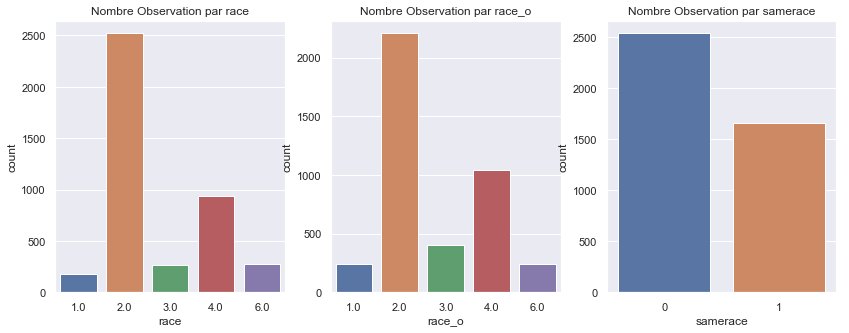

In [6]:
plt.figure(1, figsize=(14,5))
plt.subplot(131)
sns.countplot(data_men['race'])
plt.title('Nombre Observation par race')
plt.subplot(132)
sns.countplot(data_men['race_o'])
plt.title('Nombre Observation par race_o')
plt.subplot(133)
sns.countplot(data_men['samerace'])
plt.title('Nombre Observation par samerace')
plt.show()

## Création d'un dataframe avec une ligne par match

In [7]:
data

iid    id  gender  idg  condtn  wave  round  position  positin1  order  \
0       1   1.0       0    1       1     1     10         7       NaN      4   
1       1   1.0       0    1       1     1     10         7       NaN      3   
2       1   1.0       0    1       1     1     10         7       NaN     10   
3       1   1.0       0    1       1     1     10         7       NaN      5   
4       1   1.0       0    1       1     1     10         7       NaN      7   
5       1   1.0       0    1       1     1     10         7       NaN      6   
6       1   1.0       0    1       1     1     10         7       NaN      1   
7       1   1.0       0    1       1     1     10         7       NaN      2   
8       1   1.0       0    1       1     1     10         7       NaN      8   
9       1   1.0       0    1       1     1     10         7       NaN      9   
10      2   2.0       0    3       1     1     10         3       NaN     10   
11      2   2.0       0    3       1     1     10         3       NaN      9   
12      2   2.0       0    3       1     1     10         3       NaN      6   
13      2   2.0       0    3       1     1     10         3       NaN      1   
14      2   2.0       0    3       1     1     10         3       NaN      3   
15      2   2.0       0    3       1     1     10         3       NaN      2   
16      2   2.0       0    3       1     1     10         3       NaN      7   
17      2   2.0       0    3       1     1     10         3       NaN      8   
18      2   2.0       0    3       1     1     10         3       NaN      4   
19      2   2.0       0    3       1     1     10         3       NaN      5   
20      3   3.0       0    5       1     1     10         9       NaN      6   
21      3   3.0       0    5       1     1     10         9       NaN      5   
22      3   3.0       0    5       1     1     10         9       NaN      2   
23      3   3.0       0    5       1     1     10         9       NaN      7   
24      3   3.0       0    5       1     1     10         9       NaN      9   
25      3   3.0       0    5       1     1     10         9       NaN      8   
26      3   3.0       0    5       1     1     10         9       NaN      3   
27      3   3.0       0    5       1     1     10         9       NaN      4   
28      3   3.0       0    5       1     1     10         9       NaN     10   
29      3   3.0       0    5       1     1     10         9       NaN      1   
30      4   4.0       0    7       1     1     10         6       NaN      3   
31      4   4.0       0    7       1     1     10         6       NaN      2   
32      4   4.0       0    7       1     1     10         6       NaN      9   
33      4   4.0       0    7       1     1     10         6       NaN      4   
34      4   4.0       0    7       1     1     10         6       NaN      6   
35      4   4.0       0    7       1     1     10         6       NaN      5   
36      4   4.0       0    7       1     1     10         6       NaN     10   
37      4   4.0       0    7       1     1     10         6       NaN      1   
38      4   4.0       0    7       1     1     10         6       NaN      7   
39      4   4.0       0    7       1     1     10         6       NaN      8   
40      5   5.0       0    9       1     1     10         4       NaN      1   
41      5   5.0       0    9       1     1     10         4       NaN     10   
42      5   5.0       0    9       1     1     10         4       NaN      7   
43      5   5.0       0    9       1     1     10         4       NaN      2   
44      5   5.0       0    9       1     1     10         4       NaN      4   
45      5   5.0       0    9       1     1     10         4       NaN      3   
46      5   5.0       0    9       1     1     10         4       NaN      8   
47      5   5.0       0    9       1     1     10         4       NaN      9   
48      5   5.0       0    9       1     1     10         4       NaN      5   
49    

In [45]:
# Import data
df = pd.read_csv("data/SpeedDating.csv", encoding="Latin-1")
df_match = df[df.match == 1].copy()
df_match.dropna(subset=["race", "goal", "field", "from", "attr1_1", "sinc1_1",  "intel1_1", "fun1_1", "amb1_1", "attr5_1", "sinc5_1", "intel5_1", "fun5_1", "amb5_1"], inplace=True)
df_match.reset_index(drop=True, inplace=True)
list_key_date = [str(int(df_match.loc[x, 'iid'])) + "_" + str(int(df_match.loc[x, "pid"])) + "_" + str(df_match.loc[x, "wave"]) if int(df_match.loc[x, "iid"])>int(df_match.loc[x, "pid"]) else str(int(df_match.loc[x, 'pid']))  + "_" + str(int(df_match.loc[x, "iid"])) + "_" + str(df_match.loc[x, "wave"]) for x in range(df_match.shape[0])]
df_match["key_date"] = list_key_date
# Split men/women to take attributes from the two tables
df_men = df_match[df_match.gender==1].loc[:, ["key_date", "race", "goal", "field", "from", "attr1_1", "sinc1_1",  "intel1_1", "fun1_1", "amb1_1", "attr5_1", "sinc5_1", "intel5_1", "fun5_1", "amb5_1"]].copy()
df_women = df_match[df_match.gender==0].loc[:, ["key_date", "race", "goal", "field", "from", "attr1_1", "sinc1_1",  "intel1_1", "fun1_1", "amb1_1", "attr5_1", "sinc5_1", "intel5_1", "fun5_1", "amb5_1"]].copy()
df_res = df_men.merge(df_women, how="inner", on="key_date", suffixes=('_H', '_F'))

In [14]:
df_res

key_date  race_H  goal_H                                       field_H  \
0    243_235_10     2.0     2.0                           Japanese Literature   
1    243_241_10     2.0     2.0                           Japanese Literature   
2    243_242_10     2.0     2.0                           Japanese Literature   
3    244_238_10     2.0     2.0                                           MBA   
4    245_239_10     2.0     4.0                                    Philosophy   
5    246_242_10     2.0     1.0                                 biotechnology   
6    248_235_10     6.0     1.0                                      Business   
7    248_241_10     6.0     1.0                                      Business   
8    248_242_10     6.0     1.0                                      Business   
9    250_237_10     6.0     4.0                                      Classics   
10   250_238_10     6.0     4.0                                      Classics   
11   250_240_10     6.0     4.0                                      Classics   
12   250_241_10     6.0     4.0                                      Classics   
13   250_242_10     6.0     4.0                                      Classics   
14   251_242_10     6.0     6.0                            Philosophy (Ph.D.)   
15   273_268_11     2.0     2.0                                     chemistry   
16   274_252_11     3.0     3.0                                     Sociology   
17   274_253_11     3.0     3.0                                     Sociology   
18   274_263_11     3.0     3.0                                     Sociology   
19   274_264_11     3.0     3.0                                     Sociology   
20   274_268_11     3.0     3.0                                     Sociology   
21   274_269_11     3.0     3.0                                     Sociology   
22   275_261_11     2.0     2.0                           Operations Research   
23   276_258_11     2.0     2.0                             Molecular Biology   
24   276_260_11     2.0     2.0                             Molecular Biology   
25   276_261_11     2.0     2.0                             Molecular Biology   
26   276_268_11     2.0     2.0                             Molecular Biology   
27   276_270_11     2.0     2.0                             Molecular Biology   
28   277_258_11     2.0     1.0                        Genetics & Development   
29   277_259_11     2.0     1.0                        Genetics & Development   
30   277_260_11     2.0     1.0                        Genetics & Development   
31   277_261_11     2.0     1.0                        Genetics & Development   
32   277_268_11     2.0     1.0                        Genetics & Development   
33   279_256_11     2.0     3.0                                       Biology   
34   279_264_11     2.0     3.0                                       Biology   
35   279_268_11     2.0     3.0                                       Biology   
36   279_269_11     2.0     3.0                                       Biology   
37   279_270_11     2.0     3.0                                       Biology   
38   280_258_11     2.0     3.0                                       Biology   
39   280_260_11     2.0     3.0                                       Biology   
40   280_261_11     2.0     3.0                                       Biology   
41   280_264_11     2.0     3.0                                       Biology   
42   280_270_11     2.0     3.0                                       Biology   
43   281_265_11     2.0     6.0                                     Sociology   
44   281_270_11     2.0     6.0                                     Sociology   
45   282_256_11     1.0     1.0                        Electrical Engineering   
46   282_258_11     1.0     1.0                        Electrical Engineering   
47   282_260_11     1.0     1.0                        Electrical Engineering   
48   282_263_11     1.0     1.0       

In [15]:
df_res.shape

(370, 29)

In [46]:
# Cas 1: un homme d'une ethnie 1(gauche) -> une femme d'une ethnie 2(droite)
# On souhaite ce que : 
# ce que la femme attend     -> "attr1_1_F", "sinc1_1_F",  "intel1_1_F", "fun1_1_F", "amb1_1_F"
# comment l'homme est perçue -> "attr5_1_H", "sinc5_1_H", "intel5_1_H", "fun5_1_H", "amb5_1_H"
dict_match = {}
for ethnie_start in df_res['race_H'].unique():
    for ethnie_target in df_res['race_F'].unique():
        data_json = df_res[(df_res['race_H'] == ethnie_start) &(df_res['race_F'] == ethnie_target)].loc[:, ["attr1_1_F", "sinc1_1_F",  "intel1_1_F", "fun1_1_F", "amb1_1_F", "attr5_1_H", "sinc5_1_H", "intel5_1_H", "fun5_1_H", "amb5_1_H"]]
        dict_match[str(ethnie_start)+'_'+str(ethnie_target)] = data_json

In [37]:
dict_match.keys()

dict_keys(['2.0_2.0', '2.0_4.0', '2.0_3.0', '2.0_1.0', '2.0_6.0', '6.0_2.0', '6.0_4.0', '6.0_3.0', '6.0_1.0', '6.0_6.0', '3.0_2.0', '3.0_4.0', '3.0_3.0', '3.0_1.0', '3.0_6.0', '1.0_2.0', '1.0_4.0', '1.0_3.0', '1.0_1.0', '1.0_6.0', '4.0_2.0', '4.0_4.0', '4.0_3.0', '4.0_1.0', '4.0_6.0'])

In [33]:
for key in dict_match.keys():
    dict_match[key].fillna(dict_match[key].mean())

In [50]:
for key in dict_match.keys():
    dict_match[key] = dict_match[key].mean().to_dict()

In [54]:
with open('data_radar.json', 'w', encoding='utf-8') as outfile:
    json.dump(dict_match, outfile, ensure_ascii=False, indent=2)